In [1]:
#importing of libraries 
import pandas as pd
import numpy as np
import re
import string
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

In [3]:
# Define dataset directory
dataset_dir = "fake_and_real_news.csv"

# Check if directory exists
if not os.path.exists(dataset_dir):
    raise FileNotFoundError(f"Dataset directory not found: {dataset_dir}")

In [6]:
# Read all CSV files in the directory
df = pd.read_csv(os.path.join(dataset_dir))

In [9]:
# total number of dataset
len(df)

9900

In [10]:
# shape of dataset
df.shape # data set has 9990 rows and two coulumns, i column for feature and one for label

(9900, 2)

In [21]:
#Name of columns 
columns = df.columns
columns

Index(['Text', 'label'], dtype='object')

In [53]:
class_names = df['label'].unique()
class_names

array(['Fake', 'Real'], dtype=object)

In [11]:
df[:10]

,Text,label
0,top trump surrogate brutally stabs him in the ...,Fake
1,us conservative leader optimistic of common gr...,Real
2,trump proposes us tax overhaul stirs concerns ...,Real
3,court forces ohio to allow millions of illegal...,Fake
4,democrats say trump agrees to work on immigrat...,Real
5,france says pressure needed to stop north kore...,Real
6,trump on twitter august opioid crisis north k...,Real
7,busted trump supporter used poll watcher crede...,Fake
8,fatal niger operation sparks calls for public ...,Real
9,trump says he has great heart for immigrant dr...,Real


In [13]:
#Total number of fake and Real news dataset
label_counts = df['label'].value_counts()
label_counts

label
Fake    5000
Real    4900
Name: count, dtype: int64

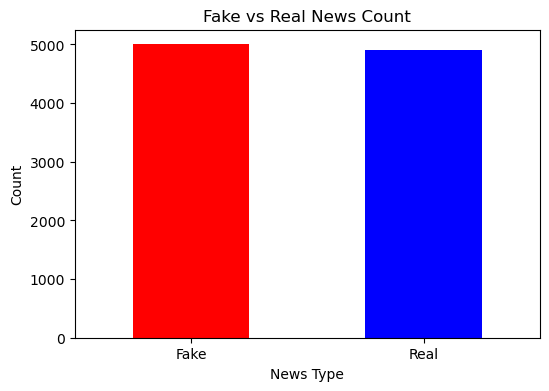

In [16]:
# Visualizing the count of Fake and Real News
plt.figure(figsize=(6, 4))
df['label'].value_counts().plot(kind='bar', color=['red', 'blue'])
plt.title("Fake vs Real News Count")
plt.xlabel("News Type")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

In [7]:
# Data Cleaning Function
def preprocess_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\d+', '', text)  # Remove numbers
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    text = text.strip()  # Remove leading/trailing whitespace
    return text

In [22]:
# Apply preprocessing
df['Text'] = df['Text'].apply(preprocess_text)
#checking our first news to see if the applied is working 
df['Text'][0]

'top trump surrogate brutally stabs him in the back ‘he’s pathetic’ video it s looking as though republican presidential candidate donald trump is losing support even from within his own ranks you know things are getting bad when even your top surrogates start turning against you which is exactly what just happened on fox news when newt gingrich called trump  pathetic gingrich knows that trump needs to keep his focus on hillary clinton if he even remotely wants to have a chance at defeating her however trump has hurt feelings because many republicans don t support his sexual assault against women have turned against him including house speaker paul ryan rwi so that has made trump lash out as his own partygingrich said on fox news look first of all let me just say about trump who i admire and i ve tried to help as much as i can there s a big trump and a little trump the little trump is frankly pathetic i mean he s mad over not getting a phone call trump s referring to the fact that paul

In [25]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(df['Text'], df['label'], test_size=0.2, random_state=42)
# checking the lenght of the test and train datasets 
X_train.shape, X_test.shape

((7920,), (1980,))

In [42]:
# Convert text into numerical format using TF-IDF
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

In [44]:
# Get feature names (words in the vocabulary)
feature_names = vectorizer.get_feature_names_out()
print("First 20 features:", feature_names[:20])

First 20 features: ['aa' 'aaa' 'aaaaackkk' 'aaaarrgh' 'aaf' 'aafter' 'aai' 'aaja' 'aalberts'
 'aaldef' 'aaliyah' 'aalo' 'aaminus' 'aaplo' 'aaplus' 'aarghshelly'
 'aaron' 'aaroncovfefe' 'aaronhunter' 'aaronkatersky']


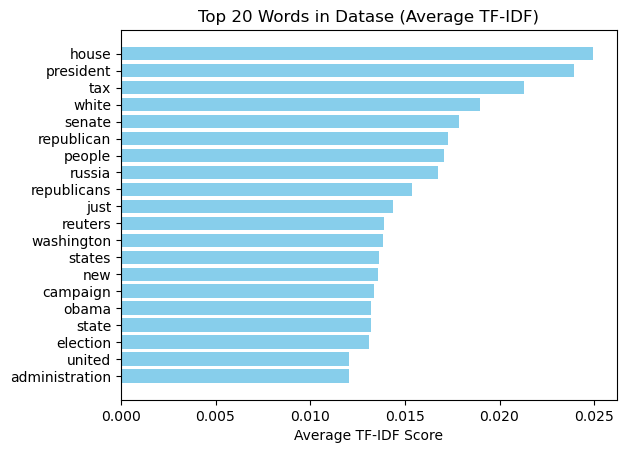

In [59]:
# Get average TF-IDF per word
avg_tfidf = np.asarray(X_train_tfidf.mean(axis=0)).flatten()

# Top 20 words
top_idx = avg_tfidf.argsort()[-20:][::-1]
top_words = [feature_names[i] for i in top_idx]
top_scores = avg_tfidf[top_idx]

# Plot
plt.barh(top_words, top_scores, color='skyblue')
plt.title("Top 20 Words in Datase (Average TF-IDF)")
plt.xlabel("Average TF-IDF Score")
plt.gca().invert_yaxis()
plt.show()

In [46]:
# Train a KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_tfidf, y_train)

KNeighborsClassifier()

In [47]:
# Make predictions
y_pred = knn_model.predict(X_test_tfidf)

In [48]:
# Evaluate the model on test data set
accuracy = accuracy_score(y_test, y_pred)
print("Model Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, y_pred))

Model Accuracy: 0.8358585858585859
Classification Report:
               precision    recall  f1-score   support

        Fake       0.92      0.73      0.81       973
        Real       0.78      0.94      0.85      1007

    accuracy                           0.84      1980
   macro avg       0.85      0.83      0.83      1980
weighted avg       0.85      0.84      0.83      1980



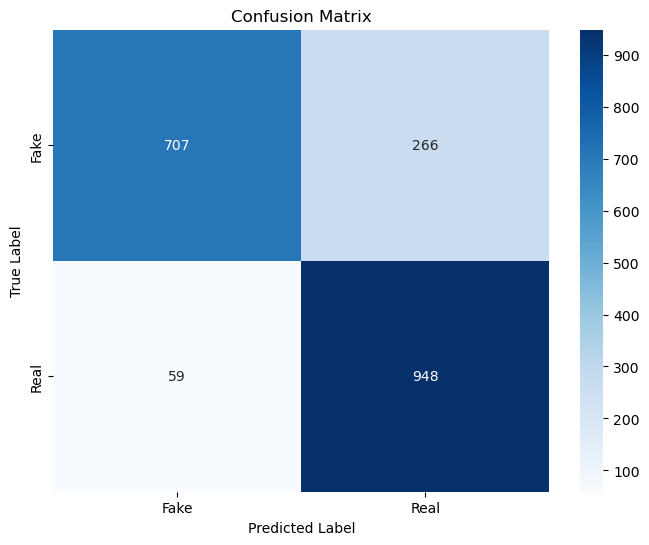

In [54]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [55]:
# Function to predict fake or real news
def predict_news(news_text):
    news_text = preprocess_text(news_text)
    text_tfidf = vectorizer.transform([news_text])
    prediction = knn_model.predict(text_tfidf)[0]
    return "Real News" if prediction == "Real" else "Fake News"

In [56]:
# Example usage
news_example = "The government has passed a new law to regulate social media."
print("Prediction:", predict_news(news_example))

Prediction: Fake News


In [58]:
#saving model
import pickle

# Save the model
with open('knn_model.pkl', 'wb') as file:  # 'wb' = write binary
    pickle.dump(knn_model, file)